In [1]:
import random
import math
import json
import argparse
import matplotlib.pyplot as plt
import os

In [11]:
class Brick:
    def __init__(self, x, y, z, label='None', shape='None', color = 'None'):
        self.x = x
        self.y = y
        self.z = z
        self.label = label
        self.shape = shape
        self.color = color
    def __str__(self):
        x = self.x
        res = 'Brick at ({}, {}, {}, {}, {}, {})'.format(self.x, self.y, self.z, self.label, self.shape, self.color)
        return res
    
    def get_position_description(self, bricks):
        #print(len(bricks))
        for item in bricks:
            if item.x == self.x and item.y == self.y and abs(item.z - self.z)==1:
                prev_brick = item
                break
            elif item.x == self.x and item.z == self.z and abs(item.y - self.y)==1:
                prev_brick = item
                break
            elif item.y == self.y and item.z == self.z and abs(item.x - self.x)==1:
                prev_brick = item
                break
            else:
                continue
        x_diff = self.x - prev_brick.x
        y_diff = self.y - prev_brick.y
        z_diff = self.z - prev_brick.z

        if x_diff == 0 and y_diff == 0 and z_diff == 1:
            return "The brick {} is on top of the brick {} . ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == 0 and z_diff == -1:
            return "The brick {} is below the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == 1 and z_diff == 0:
            return "The brick {} is to the right of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 0 and y_diff == -1 and z_diff == 0:
            return "The brick {} is to the left of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == 1 and y_diff == 0 and z_diff == 0:
            return "The brick {} is in front of the brick {}. ".format(self.label, prev_brick.label)
        elif x_diff == -1 and y_diff == 0 and z_diff == 0:
            return "The brick {} is behind the brick {}. ".format(self.label, prev_brick.label)
        else:
            return "next to the previous brick, but not in any particular direction"


def distance(a, b):
    return math.sqrt((a.x - b.x)**2 + (a.y - b.y)**2 + (a.z - b.z)**2)

def find_nearest_bricks(bricks, target, target_color="white"):
    min_distance = float('inf')
    nearest_brick = None

    for brick in bricks:
        if brick.color == target_color:
            dist = distance(brick, target)
            
            if dist < min_distance:
                min_distance = dist
                nearest_brick = brick
    # print("The nearest {} object of brick {} is {}".format(target_color, target.label, nearest_brick.label ))
    return nearest_brick

def find_farthest_bricks(bricks, target, target_color="white"):
    max_distance = float('-inf')
    farthest_brick = None

    for brick in bricks:
        if brick.color == target_color:
            dist = distance(brick, target)
            if dist > max_distance:
                min_distance = dist
                farthest_brick = brick
    # print("The farthest {} object of brick {} is {}".format(target_color, target.label, farthest_brick.label ))
    return farthest_brick

def build_bricks(n, m, height, shuffle):
    flag = 65
    bricks=[]
    colors = ['blue', 'yellow', 'white']
    shapes = ['triangle', 'square']
    # shapes = ['square']
    all_nums = 26
    label_list = [chr(i+flag) for i in range(all_nums)]

    for i in range(n):
        for j in range(m):
            index = random.randint(0, 2)
            color = colors[index]
            shape = shapes[1] # default shape to square
            if shuffle:
                random_element = random.choice(label_list)
                label_list.remove(random_element)
            else:
                random_element = chr(flag)
            bricks.append(Brick(i, j, 0, random_element, shape, color ) )
            flag+=1

    num_bricks = random.randint(5, 26)
    while len(bricks) < num_bricks:
        y = random.randint(0, m-1)
        # Find the maximum z value at this y coordinate
        max_z = max([brick.z for brick in bricks if brick.y == y], default=-1)
        new_z = max_z + 1
        if new_z > height:
            break
        # Randomly select x coordinate (if n > 1)
        x = 0 if n == 1 else random.randint(0, n-1)

        index = random.randint(0, 2)
        color = colors[index]
        shape = shapes[1]
        
        if shuffle:
            random_element = random.choice(label_list)
            label_list.remove(random_element)
        else:
            random_element = chr(flag)

        brick = Brick(x, y, new_z, random_element, shape, color)
        bricks.append(brick)
        flag += 1
    return bricks


def make_dict(dict_ ,brick, bricks):
    for item in bricks:
        if item.x == brick.x and item.y == brick.y and item.z - brick.z==1:
            dict_[item.label] = brick.label
        else:
            continue
            
def remove_bricks(brick, brick_dict, res):
  
 
    above_bricks = []
    for b, a in brick_dict.items():
        if a == brick:
            above_bricks.append(b)
    for b in above_bricks:
        res = remove_bricks(b, brick_dict,res)
    # print(brick)
    if brick not in brick_dict.keys():
        res = res + brick
        return res
    res = res + brick
    brick_dict.pop(brick)
    return res


def draw_bricks(bricks, filename, show=0, save=0, color=0, vgap=0, hgap=0):
    """
    Draw the bricks as colored rectangles with labels.
    """
    fig, ax = plt.subplots()
    for brick in bricks:
        # Define the position and size of the rectangle
        if color:
            fill_color = brick.color
        else:
            fill_color = 'white'
        line_color='gray'
        rect = plt.Rectangle((brick.y+brick.y*hgap, brick.z+brick.z*vgap), 1, 1, facecolor=fill_color, edgecolor=line_color, alpha=0.5)
        ax.add_patch(rect)
        # Add the label in the center of the rectangle
        plt.text(brick.y + brick.y*hgap + 0.5, brick.z + brick.z * vgap + 0.5, brick.label, ha='center', va='center', fontsize=12, color='black')
    
    # Set the limits of the plot
    ax.set_xlim(-1, max([b.y for b in bricks])*(1+hgap) + 2)
    ax.set_ylim(-1, max([b.z for b in bricks])*(1+vgap) + 2)
    ax.set_aspect('equal')  # Keep the aspect ratio square

    plt.axis('off')
    if show:
        plt.show()
    if save:
        plt.savefig(filename)
        plt.close(fig)


def rebuild_bricks(data):
    '''Given a dictionary of bricks data, this function rebuilds the bricks object'''
    if len(data['brick_layout']) > 1:
        dim = 2
    else:
        dim = 1
    bricks=[]
    if dim == 1:
        brick_layout = data["brick_layout"][0].split(",")
        brick_colors = data["brick_colors"][0].split(",")
        # print(brick_layout)
        # print(brick_colors)

        for m in range(len(brick_layout)):
            for z in range(len(brick_layout[m])):
                letter = brick_layout[m][z]
                color = brick_colors[m][z]
                shape = 'square'
                bricks.append(Brick(0, 0, m, letter, shape, color))
        return bricks

    elif dim == 2:
        brick_layout = [x.split(',') for x in data["brick_layout"]]
        brick_colors = [x.split(',') for x in data["brick_colors"]]
        # print(brick_layout)
        # print(brick_colors)

        for m in range(len(brick_layout)):
            for z in range(len(brick_layout[m])):
                letter = brick_layout[m][z]
                color = brick_colors[m][z]
                shape = 'square'
                bricks.append(Brick(0, m, z, letter, shape, color))
        return bricks

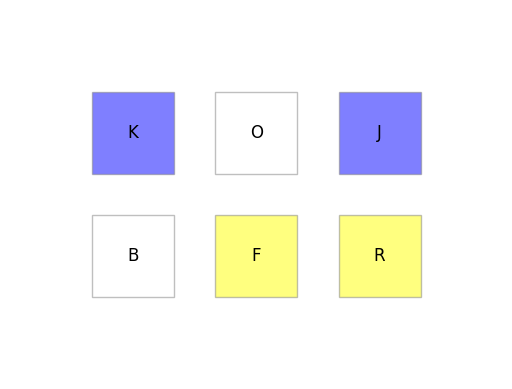

In [13]:
n, m, height, shuffle = 2, 2, 5, True
example_data_1D = {
    "brick_layout": ["J,E,F,N,V,S,H,I,M,R"],
    "brick_colors": ["blue,yellow,yellow,white,white,blue,yellow,yellow,blue,blue"]
}

example_data_2D = {
    "brick_layout": ["B,K", "F,O", "R,J"],
    "brick_colors": ["white,blue", "yellow,white", "yellow,blue"]
}
# def build_bricks(n, m, height, shuffle):

bricks = ''
bricks = rebuild_bricks(example_data_2D)
draw_bricks(bricks, "bricks_1D.png", show=1, save=0, color=1)   

In [4]:

parser = argparse.ArgumentParser(description="test LLM planning abilities")

parser.add_argument(
    "--n",
    type=int,
    default=1,
    help="",
)
parser.add_argument(
    "--m",
    type=int,
    default=1,
    help="",
)
parser.add_argument(
    "--l_low",
    type=int,
    default=7,
    help="num",
)
parser.add_argument(
    "--l_high",
    type=int,
    default=10,
    help="num",
)
parser.add_argument(
    "--dim",
    type=int,
    default=1,
    help="dim",
)
parser.add_argument(
    "--N",
    type=int,
    default=500,
    help="iterations"
)
parser.add_argument(
    "--s",
    type=int,
    default=1,
    help='shuffle label 1 true 0 false'
)

NameError: name 'j' is not defined

In [ ]:
args = parser.parse_args()
l_low = args.l_low 
l_high = args.l_high
n = args.n
m = args.m
dim = args.dim
N = args.N
shuffle_label = bool(args.s)
data_list = []


In [17]:
dim = 2
N = 50
res_dir = f'../data/brick_2D_50/'
image_dir = 'images'
image_dir = os.path.join(res_dir, image_dir)
open_path = os.path.join(res_dir, 'data.json')
os.makedirs(image_dir, exist_ok=True)

In [23]:
with open(open_path, 'r') as f:
    data = json.load(f)
    color = 1
    if color:
        cstring = 'color'
    else:
        cstring = 'bw'
    for i, row in enumerate(data):
        bricks = rebuild_bricks(row)
        img_name = os.path.join(image_dir, f"img_{i}_{cstring}_gap.png")
        draw_bricks(bricks, img_name, show=0, save=1, color=1, hgap=1)

In [ ]:

for i in range(N):
    list_char = []
    color_set = set({})
    shape_set = set({})
    flag = 65

    l = random.randint(l_low, l_high)

    if dim ==1:
        n = m = 1
    elif dim ==2:
        if n > 1: m = 0
    
    for j in range(n * m):
        list_char.append(chr(flag+j))
    char_index = random.randint(1, 3)
    
    bricks = build_bricks(n, m,l, shuffle_label)
    for color in [0,1]:
        if color:
            image_filename=os.path.join(image_dir, f'img_{i}_color.png')
        else:
            image_filename=os.path.join(image_dir, f'img_{i}_bw.png')
        draw_bricks(bricks, image_filename, show=0, save=1, color=color)

    for item in bricks:
        color_set.add(item.color)
        shape_set.add(item.shape)
    res = "There is a set of bricks. "
    color_list = list(color_set)
    shape_list = list(shape_set)
    #random.randint(1, )
    shuffled = shuffle_label
    
    if shuffled:
        res_list = []
        for i in range(len(bricks)):
            if i > 0:
                res_list.append(bricks[i].get_position_description(bricks[:i]))
            else:
                res_list.append("For the brick {}, the color is {}. ".format(bricks[i].label, bricks[i].color))
                
        random.shuffle(res_list)

        # print("res_list", res_list)
        for item in res_list:
            res = res  + item
    else:
        for i in range(len(bricks)):
            if i>0:
            res = res +  bricks[i].get_position_description(bricks[:i])
            else:
            res = res + "For the brick {}, the color is {}. ".format(bricks[i].label, bricks[i].color)
    #res = res +". How to get brick {}".format(brick_target.label) + "?"
    res = res + "Now we have to get a specific brick. "
    rule = 'The bricks must now be grabbed from top to bottom, and if the lower brick is to be grabbed, the upper brick must be removed first. '
    res = res + rule
    num = 3
    if num == 1:
        choiced_color = random.choice(color_list)
        brick_target = find_farthest_bricks(bricks, bricks[char_index-1], target_color=choiced_color)
        if brick_target.label == bricks[char_index-1].label:
            res = res +"How to get brick {}?".format(brick_target.label)
        else:
            res = res +"How to get the farthest {} brick of the brick {}".format(choiced_color, bricks[char_index-1].label) + "?"
    elif num == 2:
        choiced_color = random.choice(color_list)
        brick_target = find_nearest_bricks(bricks, bricks[char_index-1], target_color=random.choice(color_list))
        if brick_target.label == bricks[char_index-1].label:
            res = res +"How to get brick {}?".format(brick_target.label)
        else:
            res = res +"How to get the nearest {} brick of the brick {}".format(choiced_color, bricks[char_index-1].label) + "?"
    elif num == 3:
        brick_target = bricks[char_index-1]
        #rule = 'The bricks must now be grabbed from top to bottom, and if the lower brick is to be grabbed, the upper brick must be removed first.'
        res = res + "How to get brick {}?".format(brick_target.label)
    #res = res + ". What bricks we need to remove in order?"
    dict_above = {}

    brick_labels = []
    brick_colors = []
    for y in set([brick.y for brick in bricks]):
        brick_labels.append(','.join([b.label for b in bricks if b.y == y]))
        brick_colors.append(','.join([b.color for b in bricks if b.y == y]))

    for item in bricks:
        make_dict(dict_above, item, bricks)
    label = ''
    label = remove_bricks(brick_target.label, dict_above, label)
    # if label==brick_target.label:
    #     label = brick_target.label
    data = {
        "brick_layout":brick_labels,
        "brick_colors":brick_colors,
        "image": image_filename,
        "target":brick_target.label,
        "data": res,
        "label":label,
        }
    data_list.append(data)
dataset = {"testset": data_list}


with open(save_path, 'w') as outfile:
    json.dump(data_list, outfile)